# Import Libarires

In [104]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization and Image Processing
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Machine Learning
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for loading/processing the images  
from keras.utils import load_img
from keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input 
# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# Others
import os 
import random

# Load Data

In [112]:
BASE_DIR_ORL = "./ORL/"

In [113]:
def read_images(base_dir:str=BASE_DIR_ORL):
    images = []
    labels = []
    for file_name in os.listdir(BASE_DIR_ORL):
        try:
            image = cv2.imread(os.path.join(BASE_DIR_ORL, file_name))
            # Convert it from BGR to RGB so we can plot them later (because openCV reads images as BGR)
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            label = file_name.split('_')[1].split('.')[0]
            
            if image is not None:
                images.append(image)
                labels.append(label)
                
            else:
                print(f"Image {file_name} is None!")
        
        except Exception as e:
            print(f"Error: {e}")

    return images, labels
           

# Show Sample Images

In [114]:
images, labels = read_images()

In [180]:
images[0].shape

(80, 70, 3)

In [115]:
pixel_features = np.array([image.flatten() for image in images])

In [116]:
def show_random_images(images, labels, num=2):
    sorted_labels = list(map(int, set(labels)))
    sorted_labels.sort()
    for code in sorted_labels:
        indicies = [i for i, label in enumerate(labels) if label == str(code)]
        random_indicies = [random.choice(indicies) for i in range(num)]
        figure, axis = plt.subplots(1, num)

        print("{} random images for code {}".format(num, code))

        for image in range(num):
            axis[image].imshow(images[random_indicies[image]])
        plt.show()
    

2 random images for code 1


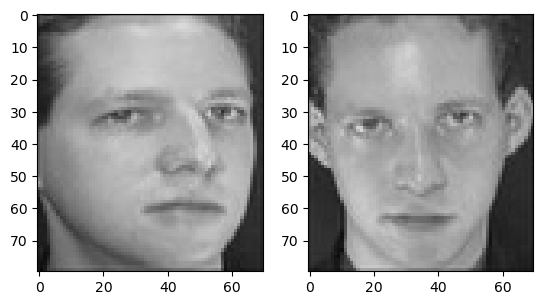

2 random images for code 2


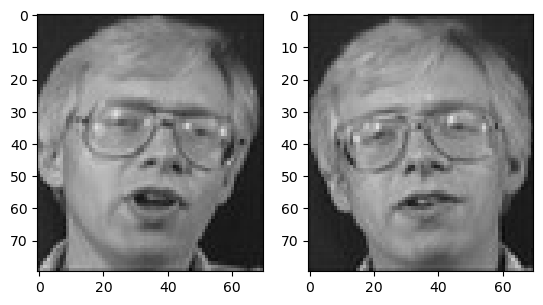

2 random images for code 3


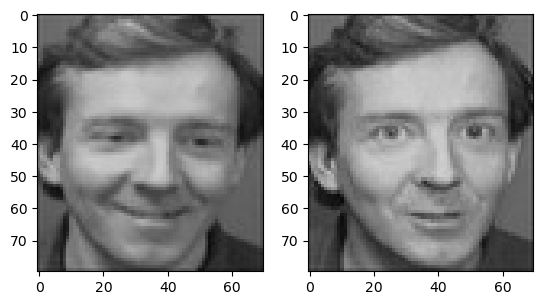

2 random images for code 4


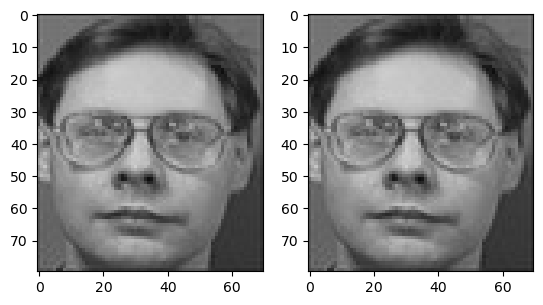

2 random images for code 5


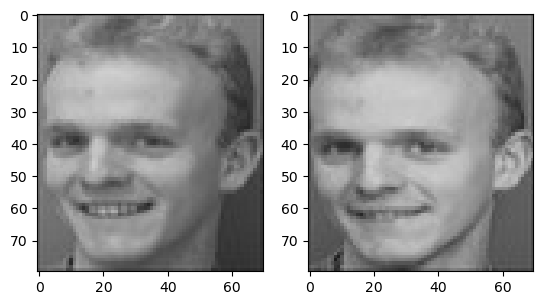

2 random images for code 6


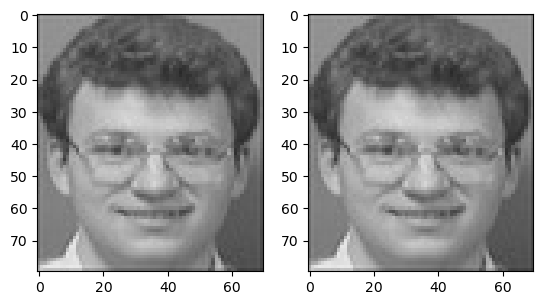

2 random images for code 7


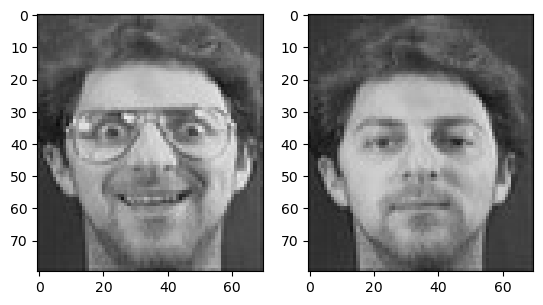

2 random images for code 8


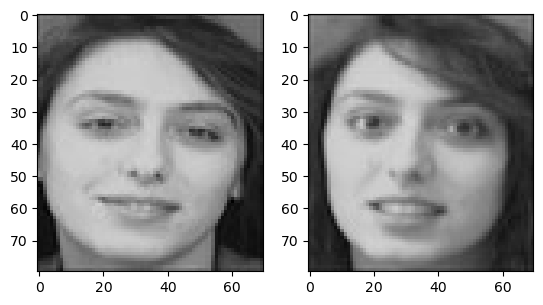

2 random images for code 9


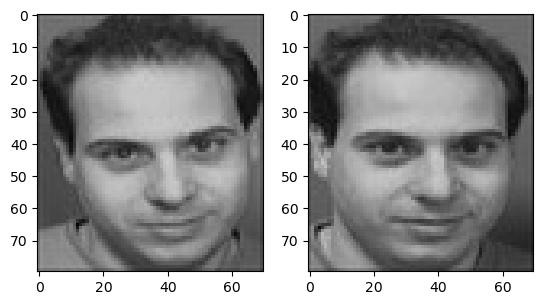

2 random images for code 10


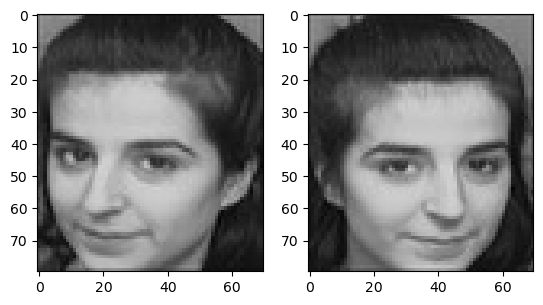

2 random images for code 11


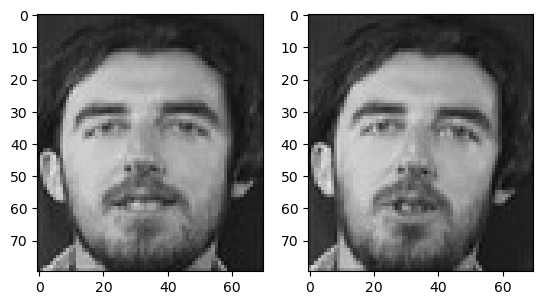

2 random images for code 12


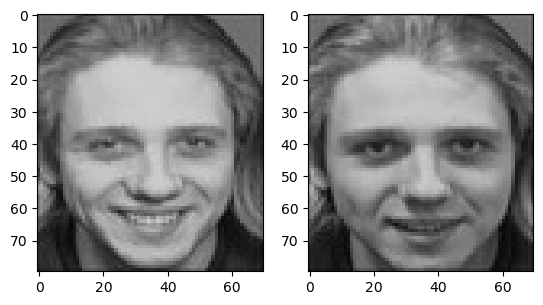

2 random images for code 13


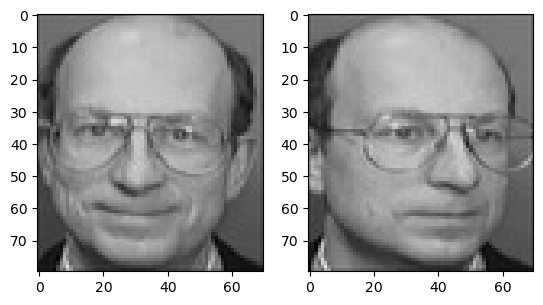

2 random images for code 14


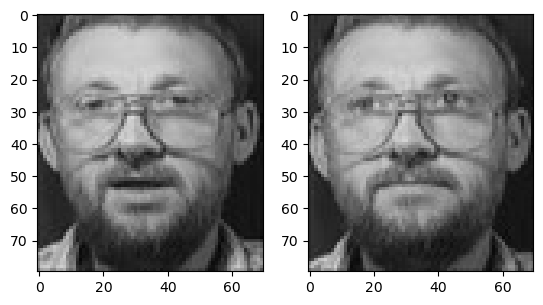

2 random images for code 15


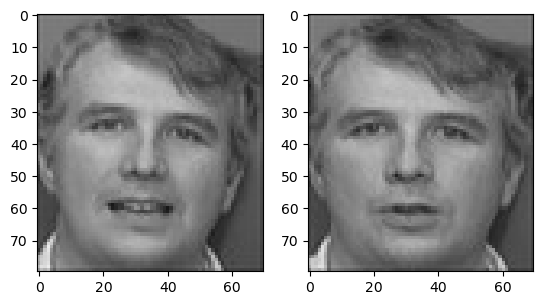

2 random images for code 16


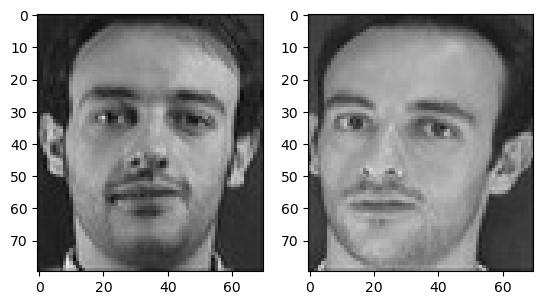

2 random images for code 17


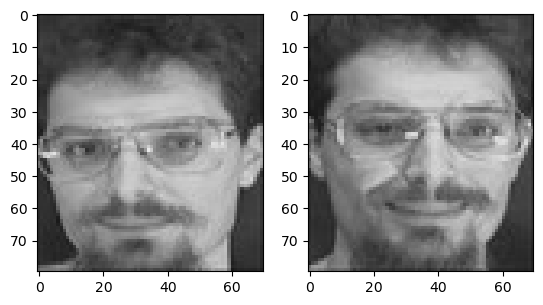

2 random images for code 18


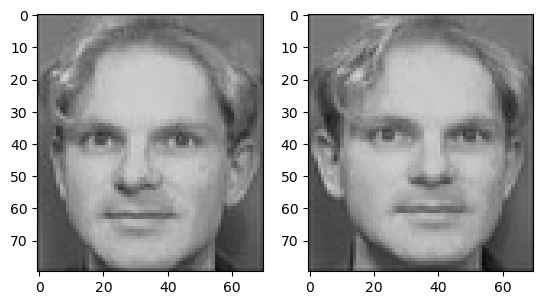

2 random images for code 19


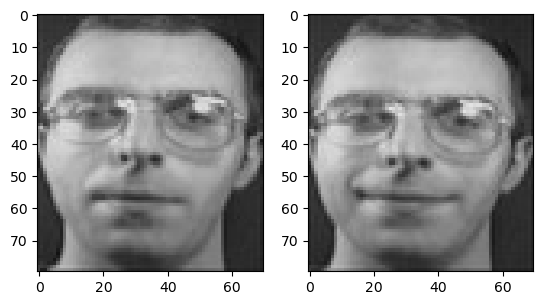

2 random images for code 20


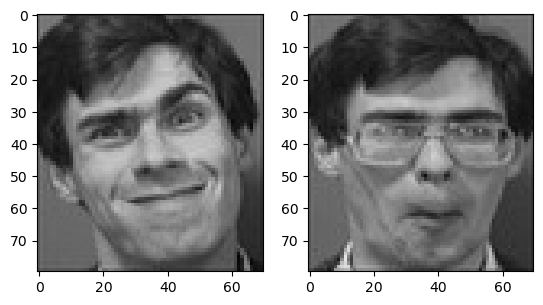

2 random images for code 21


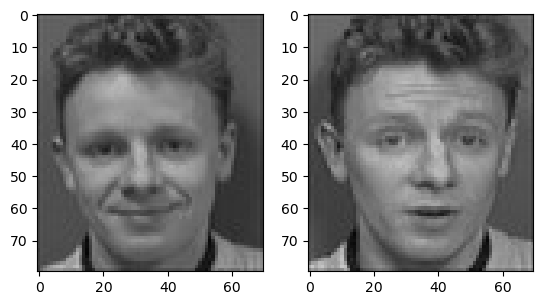

2 random images for code 22


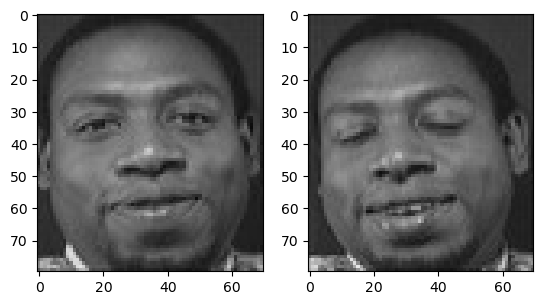

2 random images for code 23


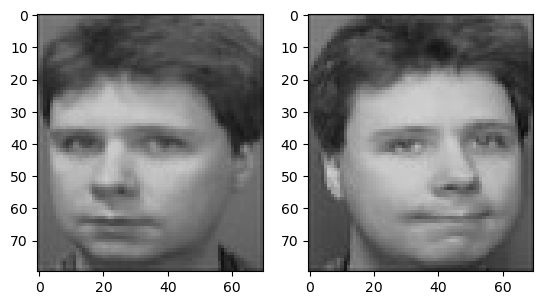

2 random images for code 24


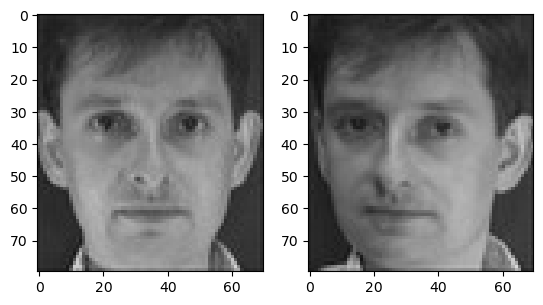

2 random images for code 25


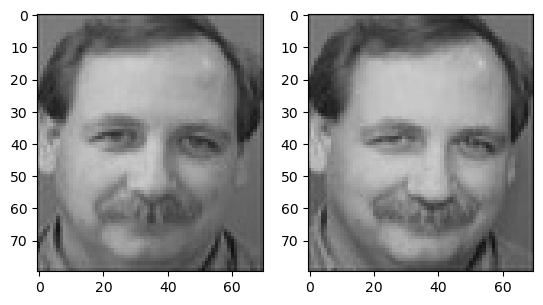

2 random images for code 26


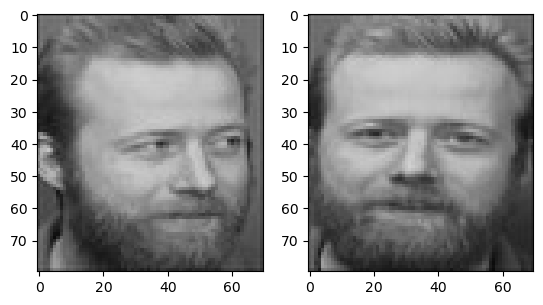

2 random images for code 27


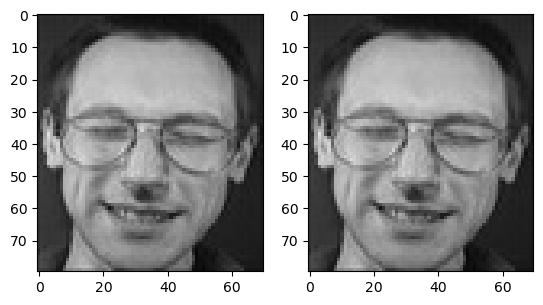

2 random images for code 28


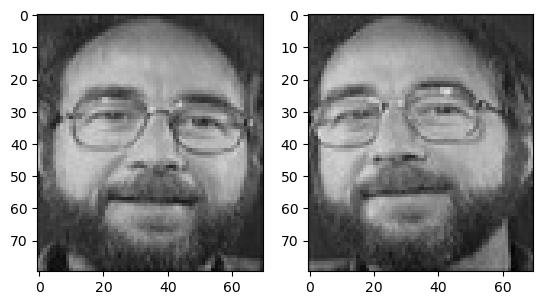

2 random images for code 29


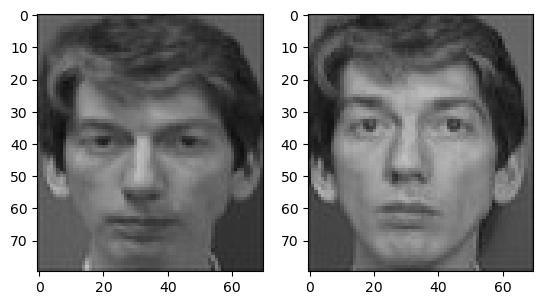

2 random images for code 30


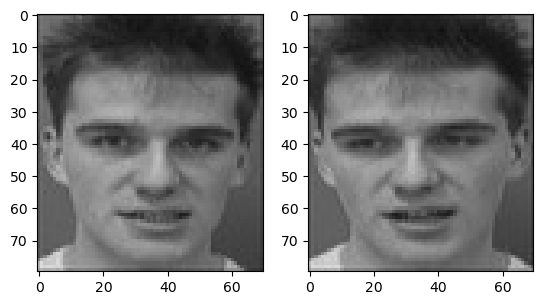

2 random images for code 31


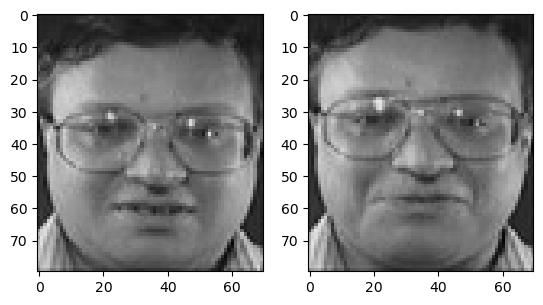

2 random images for code 32


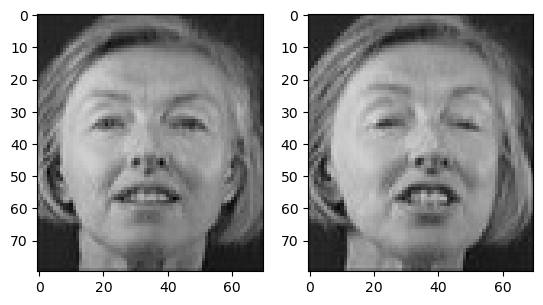

2 random images for code 33


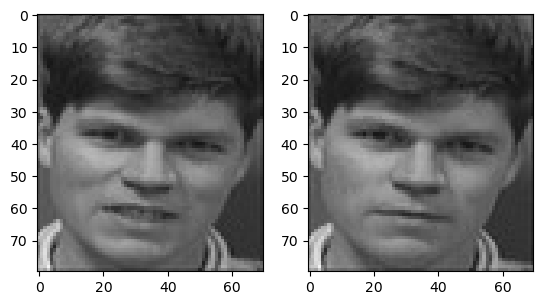

2 random images for code 34


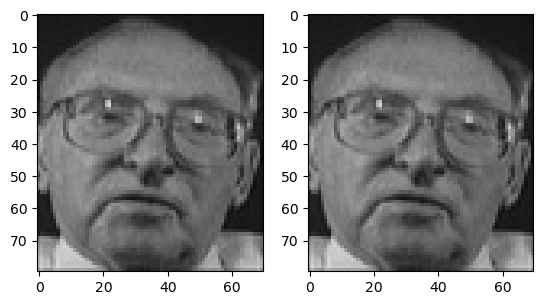

2 random images for code 35


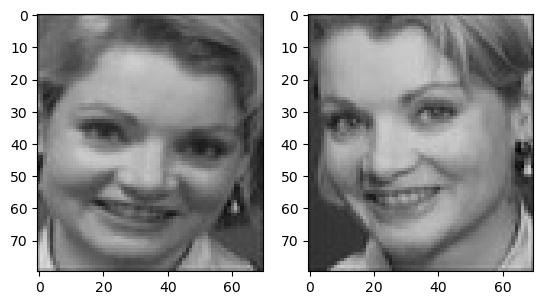

2 random images for code 36


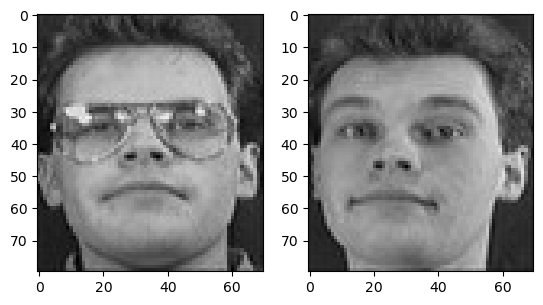

2 random images for code 37


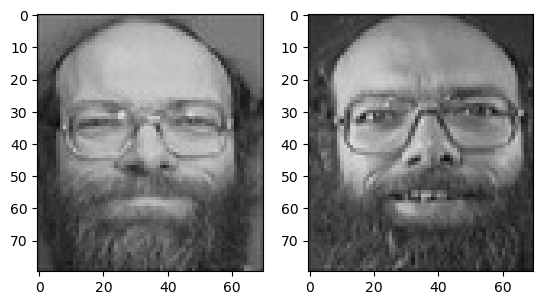

2 random images for code 38


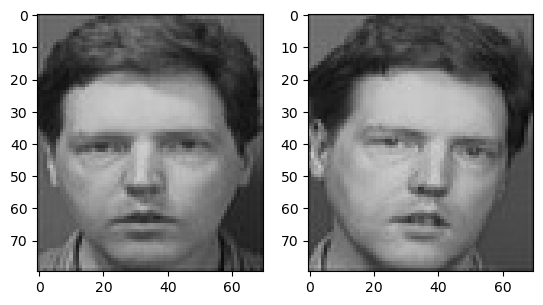

2 random images for code 39


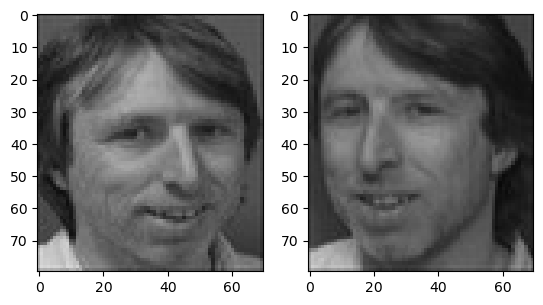

2 random images for code 40


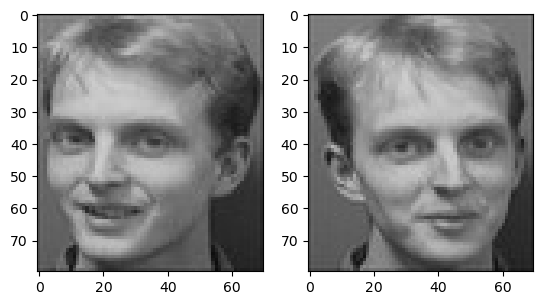

2 random images for code 41


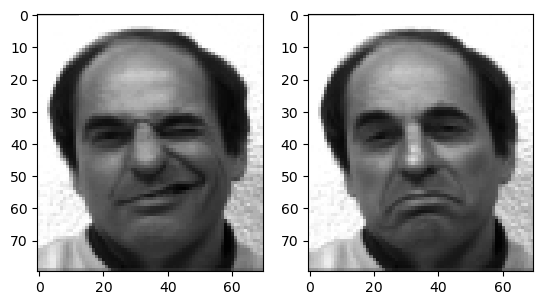

In [117]:
show_random_images(images, labels, num=2)

# Feature Extraction

# Dimention Reduction

In [18]:
from sklearn.manifold import TSNE
X = pixel_features
y = labels
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3, ).fit_transform(X)

In [19]:
# Create a colormap for distinct colors for each class
num_classes = len(np.unique(labels))
colors = plt.cm.jet(np.linspace(0, 1, num_classes))

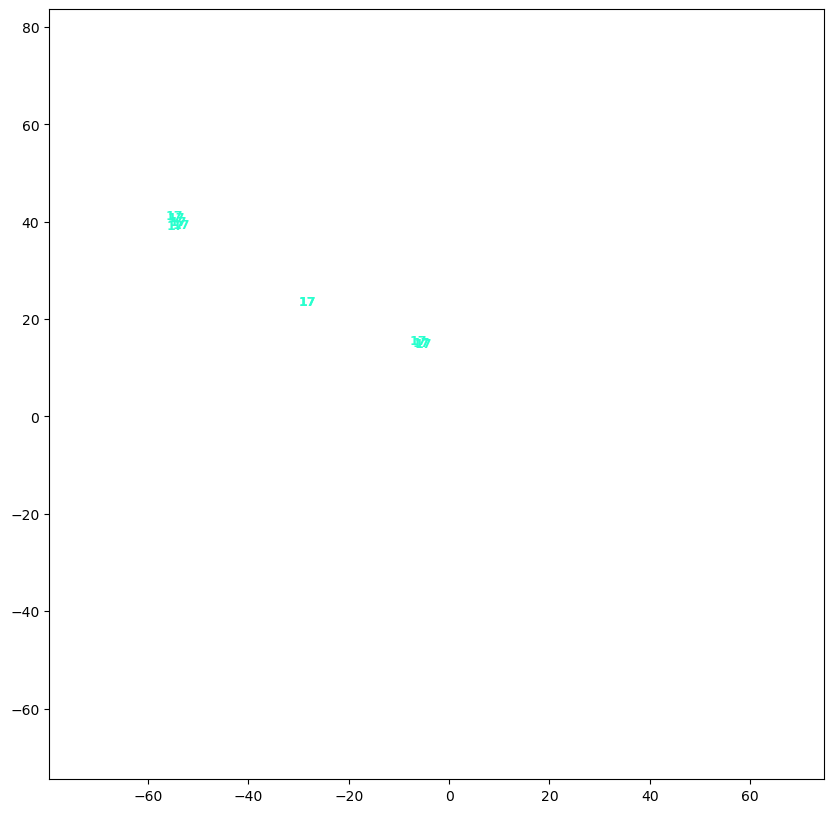

In [28]:
plt.figure(figsize=(10, 10))
plt.xlim(X_embedded[:, 0].min(), X_embedded[:, 0].max()+1)
plt.ylim(X_embedded[:, 1].min(), X_embedded[:, 1].max()+1)
for i in range(len(labels)):
    if labels[i] == '17':
        plt.text(X_embedded[i, 0], X_embedded[i, 1], labels[i], color=colors[int(labels[i])-1], fontdict={'weight': 'bold', 'size' : 9})
plt.show()

# Train Model

In [66]:
from sklearn.cluster import KMeans

In [71]:
# Cluster the data using k-means
kmeans = KMeans(n_clusters=41, random_state=42)
labels_pred_kmeans = kmeans.fit_predict(X)
labels_pred_kmeans = labels_pred_kmeans +1

/home/afsharino/anaconda3/envs/everything/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Evaluation

In [84]:
from sklearn.metrics.cluster import rand_score
rand_score(list(map(int, labels)), labels_pred_kmeans)

0.9769694078358877

In [87]:
# Create a colormap for distinct colors for each class
num_classes = len(np.unique(labels_pred_kmeans))
colors1 = plt.cm.jet(np.linspace(0, 1, num_classes))

In [ ]:
plt.figure(figsize=(10, 10))
plt.xlim(X_embeded[:, 0].min(), X_embeded[:0].max())
plt.ylim(X_embeded[:, 1].min(), X_embeded[:1].max())
plt.scatter()

# Test area

In [51]:
os.getcwd()

'/home/afsharino/Desktop/Term 10/TA/Computational Intelligence/Projects/01. Clustering/Test'

In [55]:
BASE_DIR = './lfw/'
BASE_DIR_10 = './lfw_10/'

In [57]:
list_of_dirs = []
for dir in os.listdir(BASE_DIR):
    #print(os.listdir(os.path.join(BASE_DIR, dir)))
    length = len(os.listdir(os.path.join(BASE_DIR, dir)))
    list_of_dirs.append((dir, length))

In [58]:
def func(param):
    return param[1]

In [59]:
list_of_dirs.sort(key=func, reverse=True)  

In [60]:
selected_dirs = [ name [0] for name in list_of_dirs[:10]]

In [61]:
import shutil
for dir in os.listdir(BASE_DIR_10):
    if dir not in selected_dirs:
        shutil.rmtree(os.path.join(BASE_DIR_10, dir))

# Feature Extraction

In [302]:
images_path = []
for dir in os.listdir(BASE_DIR_10):
    new_dir = os.path.join(BASE_DIR_10, dir)
    for file in os.listdir(new_dir):
        images_path.append(os.path.join(new_dir, file))

In [303]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    #name = ' '.join(file.split('/')[-1].split('.')[0].split('_')[:2])
    name = int(file.split('/')[-1].split('.')[0].split('_')[-1])
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    
    # Flatten the features to a 1D array
    features = features.flatten()


    return features, name

In [304]:
images_path = []
for file in os.listdir(BASE_DIR_ORL):
    new_dir = os.path.join(BASE_DIR_ORL, file)
    images_path.append(new_dir)

In [305]:
features = []
labels = []

# lop through each image in the dataset
for path in images_path:
    # try to extract the features and update the dictionary
    feat, name = extract_features(path,model)
    features.append(feat)
    labels.append(name)

1/1 [==============================] - 0s 328ms/step
28
1/1 [==============================] - 0s 198ms/step
3
1/1 [==============================] - 0s 294ms/step
31
1/1 [==============================] - 0s 232ms/step
13
1/1 [==============================] - 0s 217ms/step
38
1/1 [==============================] - 0s 295ms/step
19
1/1 [==============================] - 0s 383ms/step
9
1/1 [==============================] - 0s 332ms/step
1
1/1 [==============================] - 0s 256ms/step
36
1/1 [==============================] - 0s 282ms/step
12
1/1 [==============================] - 0s 340ms/step
19
1/1 [==============================] - 0s 300ms/step
7
1/1 [==============================] - 0s 365ms/step
24
1/1 [==============================] - 0s 238ms/step
6
1/1 [==============================] - 0s 257ms/step
28
1/1 [==============================] - 0s 308ms/step
22
1/1 [==============================] - 0s 237ms/step
14
1/1 [==============================] - 0s 285ms/step


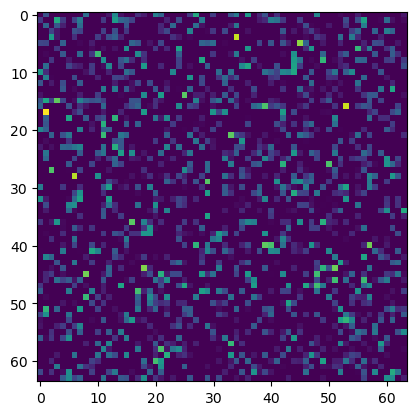

In [306]:
plt.imshow(features[0].reshape(64, -1))

In [234]:
unique_names = set(labels)
name_to_id = {name: i+1 for i, name in enumerate(unique_names)}
id_list = [name_to_id[name] for name in labels]

(500, 4096)

In [307]:
from sklearn.manifold import TSNE
X = np.array(features)
y = labels
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=45, ).fit_transform(X)

In [308]:
# Create a colormap for distinct colors for each class
num_classes = len(np.unique(labels))
colors = plt.cm.jet(np.linspace(0, 1, num_classes))

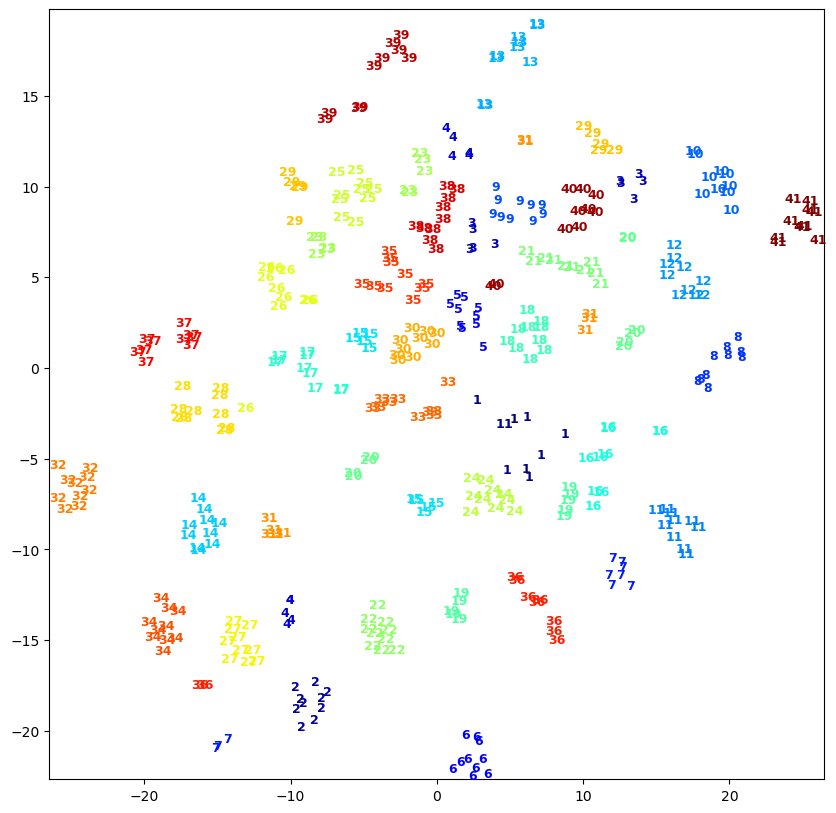

In [312]:
plt.figure(figsize=(10, 10))
plt.xlim(X_embedded[:, 0].min(), X_embedded[:, 0].max()+1)
plt.ylim(X_embedded[:, 1].min(), X_embedded[:, 1].max()+1)
for i in range(len(y)):
    #if y[i] == 1 :
        plt.text(X_embedded[i, 0], X_embedded[i, 1], y[i], color=colors[int(y[i])-1], fontdict={'weight': 'bold', 'size' : 9})
plt.show()

In [315]:
# Cluster the data using k-means
kmeans = KMeans(n_clusters=41, random_state=42)
labels_pred_kmeans = kmeans.fit_predict(X)

/home/afsharino/anaconda3/envs/everything/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [316]:
from sklearn.metrics.cluster import rand_score
rand_score(list(map(int, y)), labels_pred_kmeans)

0.9827777446478622

In [338]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1000, min_samples=4, n_jobs=-1)
labels_pred_dbscan = dbscan.fit_predict(X)

In [339]:
from sklearn.metrics.cluster import rand_score
rand_score(list(map(int, y)), labels_pred_dbscan)

0.022004889975550123